# Notebook for making summary statistics for rock magnetic data

In [1]:
import pmagpy.rockmag as rmag
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import local data in MagIC format
In this demonstration we will be using local data.

The data is from the following publication:
- Swanson-Hysell, N. L., Avery, M. S., Zhang, Y., Hodgin, E. B., Sherwood, R. J., Apen, F. E., et al. (2021). The paleogeography of Laurentia in its early years: New constraints from the Paleoproterozoic East-Central Minnesota Batholith. Tectonics, 40, e2021TC006751. https://doi.org/10.1029/2021TC006751

In [2]:
# set the dir_path to the directory where the measurements.txt file is located
dir_path = '../example_data/ECMB'

# set the name of the MagIC file
ipmag.unpack_magic('ECMB 2018.TXT', 
                     dir_path = dir_path,
                     input_dir_path = dir_path,
                     print_progress=False)

# create a contribution object from the tables in the directory
contribution = cb.Contribution(dir_path)
specimens = contribution.tables['specimens'].df


1  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/ECMB/locations.txt
312  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/ECMB/samples.txt
1574  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/ECMB/specimens.txt
90  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/ECMB/sites.txt
17428  records written to file  /Users/yimingzhang/Github/RockmagPy-notebooks/example_data/ECMB/measurements.txt
-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


## filter for VSM rock magnetic data (Mr, Ms,Bcr, Bc) 

In [3]:
VSM_specimen_data = specimens[specimens['method_codes'].notna()].reset_index()
VSM_specimen_data = VSM_specimen_data[VSM_specimen_data['method_codes'].str.contains('LP-BCR-BF|LP-HYS-M')].reset_index()
VSM_specimen_data = VSM_specimen_data[['specimen', 'hyst_mr_mass', 'hyst_ms_mass', 'hyst_bcr', 'hyst_bc']]

## Option 1: filter for individual specimen data and plot them

- One has more flexibility to make a custom plot 
- However, the user has to specify the row numbers that contain each of the attributes

In [4]:
NED1_5c_VSM_data = VSM_specimen_data[VSM_specimen_data['specimen'] == 'NED1-5c'].reset_index()
NED1_5c_VSM_data

,index,specimen,hyst_mr_mass,hyst_ms_mass,hyst_bcr,hyst_bc
0,0,NED1-5c,0.006022,0.03578,NaN,0.01427
1,5,NED1-5c,0.006201,NaN,0.0264,NaN


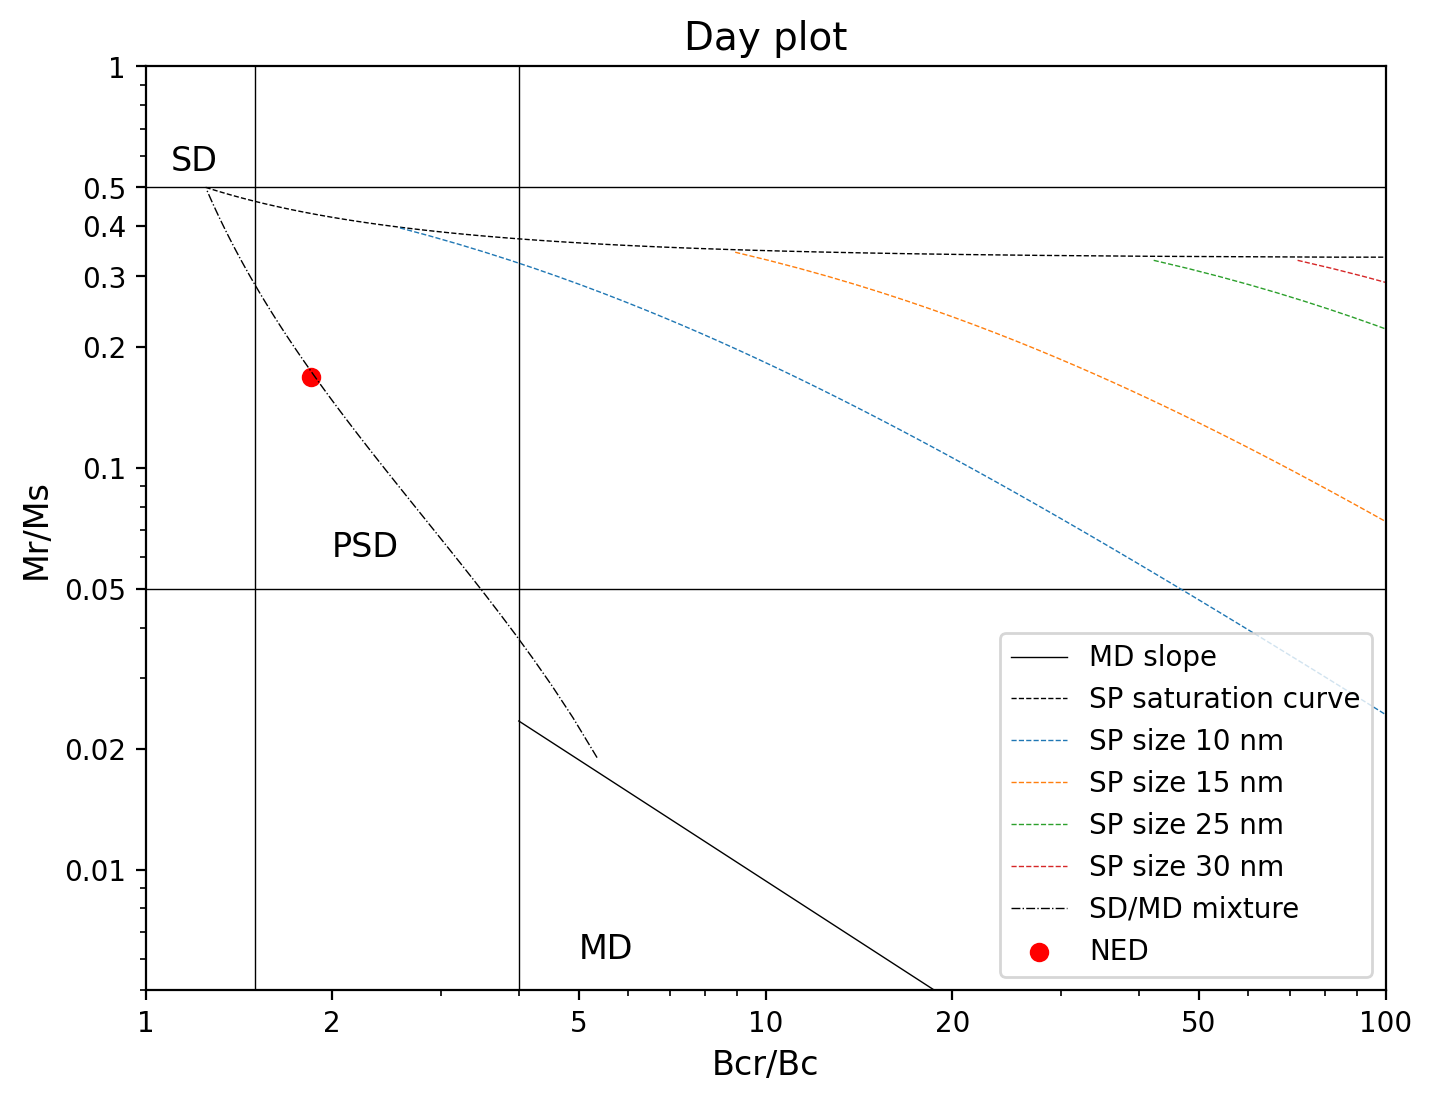

In [5]:
ax = rmag.day_plot(Mr = NED1_5c_VSM_data['hyst_mr_mass'][0], 
                   Ms = NED1_5c_VSM_data['hyst_ms_mass'][0],
                   Bcr =NED1_5c_VSM_data['hyst_bcr'][1],
                   Bc = NED1_5c_VSM_data['hyst_bc'][0], 
                   color = 'red', 
                   marker = 'o', 
                   label = 'NED', 
                   alpha=1, 
                   lc = 'black')


plt.show()

## Option 2: Plot all specimen data in a MagIC specimens data table
- Because Bcr is obtained from a backfield experiment whereas other values can be obtained from a hysteresis experiment, the data entry in the data tables are decoupled. In many cases there could be multiple entries for the same attribute for the same specimen.
- If one were to use the default approach to plot all data at once, bear in mind that the default function will simply take the average of all of the entries for the same attribute for the same specimen.

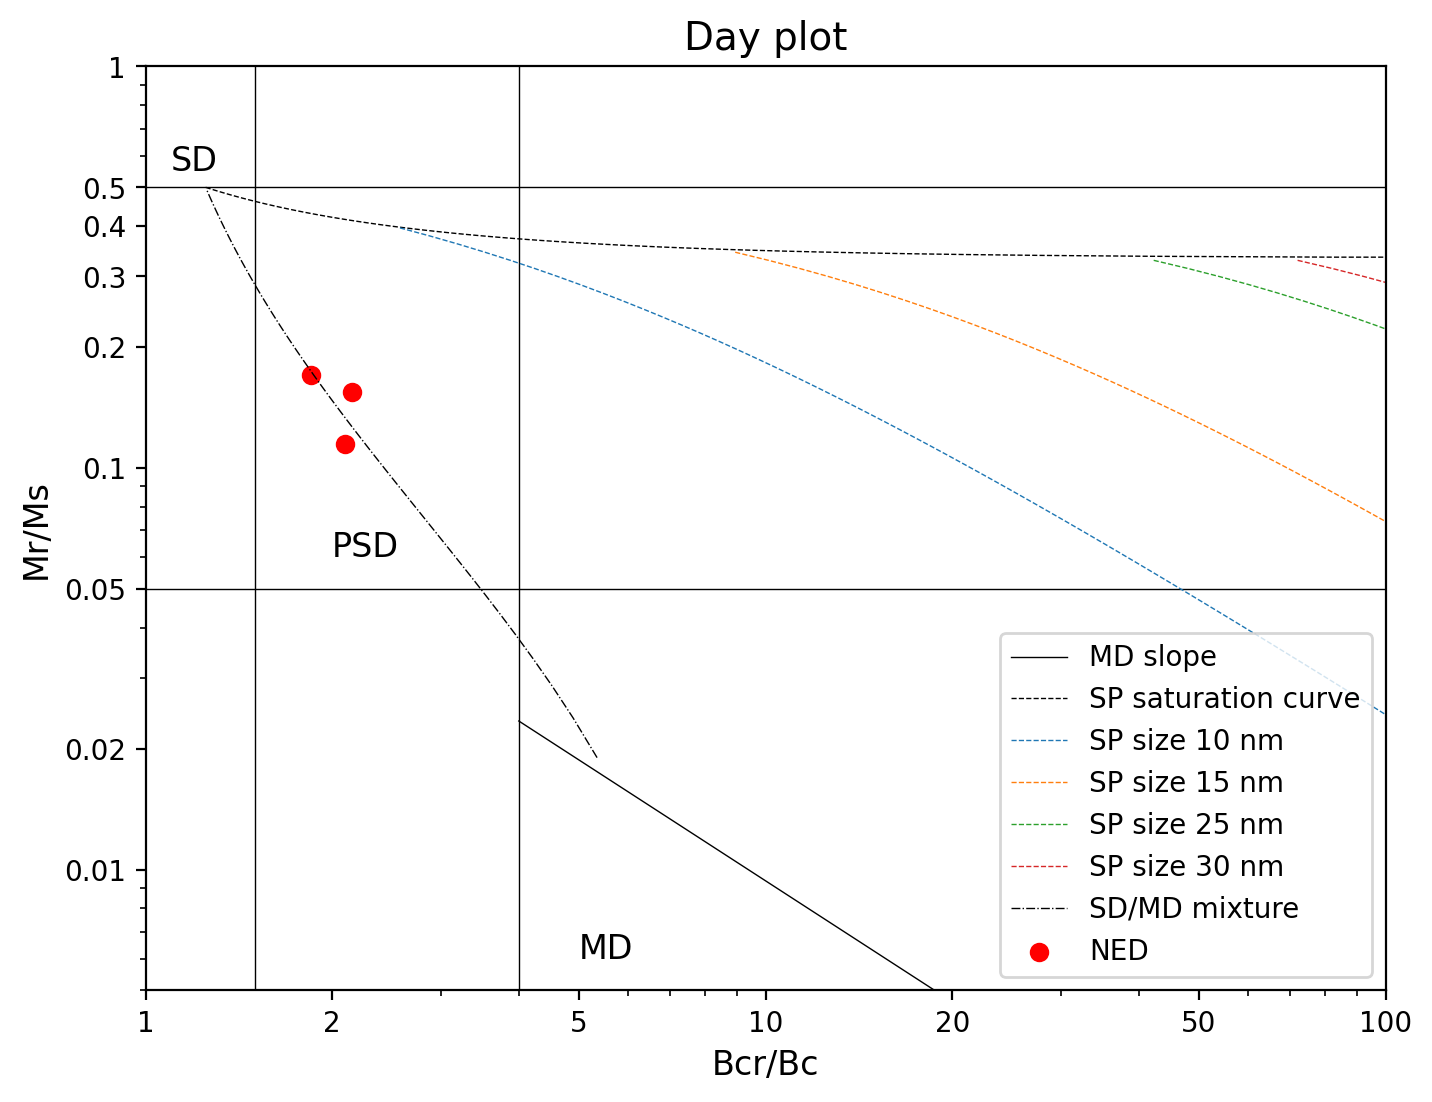

In [6]:
ax=rmag.day_plot_MagIC(VSM_specimen_data,
               by='specimen',
               Mr='hyst_mr_mass', 
               Ms='hyst_ms_mass', 
               Bcr='hyst_bcr', 
               Bc='hyst_bc', 
               color = 'red', 
               marker = 'o', 
               label = 'NED', 
               alpha=1, 
               lc = 'black')